# Introduction and background

## Overview

For our final project, we performed a predictive analysis on data from Kickstarter to see which factors are more correlated with status of a Kickstarter project (successful or failed, which is defined whether they raised the goal amount of funding) and see if we can extraploate those correlations to predict which Kickstarter projects are more likely to be successful. We did so by taking a look at some of the variables associated with projects, such as duration, USD goal, categories, and start/end months for any associations between them and whether a project is successful or failed through visualization as well as statistical tests.

## Names

- Alan Lloyd Willey
- Enlin Wei
- Kanami Hannah Tanaka
- Karen Rodriguez Pinto
- Yumi Minami
- Yuxiao Fan

## Group Members IDs

- A15746309
- A12669124
- A14714448
- A15161856
- A12938737
- A14778609

## Research Question

We are conducting this research to investigate what could be most predictive of a Kickstarter project's outcome, so the research question we wanted to ask for this project was "Among the US-based Kickstarters, which factor (within the information given in the dataset) contributes most to a Kickstarter's outcome?"


## Background and Prior Work

Before we introduce Kickstarter, we will take a look at crowdfunding platforms, which is what Kickstarter is. Basically, crowdfunding platforms allow those with innovative projects to pitch those projects to the public with a goal of a certain amount of money to raise; and if people like that idea and would like to support it, they can donate funds to help

A crowdfunding platforms like Kickstarter allows users to raise money and typically provide backer rewards or pre-order products. For example a filmmaker may offer a digital copy film, a live viewing of premier, signed posters, etc. A tech company could be offering pre-orders of their new phone cases or other product.

Kickstarter is a crowdfunding platform which was created by Perry Chen and Yancy Strickler in 2009, to be a place where the main focus is not Kickstarter's profit but success for those who pitch their projects. If a project raises enough money to meet its goal, it will receive those funds, and Kickstarter makes money from a 3-5% fee taken from the funds. Kickstarter does make efforts to ensure you keep your promises to backers and fraud charges could be made if you can't deliver or use funds improperly. Because funds from backers to creators cannot be charged unless the project reaches their goals, we consider this website is based on the perspectives of all-or-nothing.

References (include links):
- 1) "Kickstarter crowdfunding site officially launches in Canada". The Canadian Press. 10 September 2013. Retrieved 8 June 2019. https://www.cbc.ca/news/business/kickstarter-crowdfunding-site-officially-launches-in-canada-1.1703774
- 2) Isaac, Mike and David Gelles (September 21, 2015). "Kickstarter Focuses Its Mission on Altruism Over Profit". The New York Times. https://www.nytimes.com/2015/09/21/technology/kickstarters-altruistic-vision-profits-as-the-means-not-the-mission.html

## Hypothesis


We hypothesize that longer durations would likely mean a Kickstarter would fail, as that would mean backers are not as interested in the projects and thus the projects take longer to receive enough pledges to reach the goal (or may not reach the goal at all and fail). On the contrary, projects that are popular would receive pledges quickly and can hit the goal very soon.

We hypothesize that the Kickstarters which fail will likely have a high USD goal, as pledgers are likely more drawn toward projects that are "cheap" (having low goals which can be reached quickly); especially when something has a goal that is relatively high, pledgers wouldn't want to have to pledge that much for something that isn't worth that much.

We hypothesize that the main categories which possibly have strong influences on funding and become successful are ‘music’, ‘film and video’, and ‘publishing’ because those categories are easier to be promoted through funding promotions. Those categories are quite all rounders, which means that are quite inclusive to any age group, gender, or so on. Also, if the producer possibly have followers on their artistic work, it could make easier for them to acquire help for funding. Also, there could not any possible harms which be led from those products to backers, so psychologically speaking, it could be quite easier to be funded for them. Interestingly, we also assumed that the categories that failed easier could be the same categories which we assumed as the successful ones, because their funding is based on backers’ interests and preferences. In order to succeed in funding, the projects have to consider the backers’ popular and public trends; if one project was focused on one specific group of people, then it has a higher chance to fail.

We hypothesize that projects which end later in the year (around October, November, December) have a higher chance of success because the end of the year is Thanksgiving and Christmas, where consumerism goes up because people tend buy a lot of things on holidays and might be more likely to try out the new products from Kickstarter projects. So people would likely pledge projects near the end of the year so that if it becomes successful they can buy the products for the holiday season.

## Dataset(s)

- Dataset Name: Kickstarter Campaigns
- Link to the dataset: https://www.kaggle.com/yashkantharia/kickstarter-campaigns
- Number of observations: 192548

This dataset contains information about Kickstarter crowdfunding campaigns from 2014 to February 2019. The information includes the names, currency, main and subcategories, launch date and deadlines, goal amount of money to raise and actual amounts raised, whether the campaign was successful or failed, and geographical locations of the campaigns (country and state).

We found this dataset is interesting because of the following reasons:
- Kickstarter funding have done by creators and backers, and they are not based on profits consideration for each other; backers do the funding for creators if they think their projects seemed successful or beneficial.
- We can observe the data while considering the reasons why one projects went successful on funding but the other did not; There should be some factors having a correlation with successful ones and failed ones. 
- This dataset has quite a lot of columns that we could make many researches, although we are not going through all of the possible research.

# Data Analysis

## Data Cleaning & Pre-processing

In [1]:
# imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# loads Kickstarters data into dataframe
df_kickstarters = pd.read_csv("Kickstarter_projects_Feb19.csv")

In [3]:
# viewing the first rows of the dataframe
df_kickstarters.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


We decided to add a column with the difference in goal_usd and usd_pledged.

In [4]:
df_kickstarters = df_kickstarters.assign(goal_minus_pledge = df_kickstarters['goal_usd'] - df_kickstarters['usd_pledged'])

We will first take the subset of US-based kickstarters only, since other countries may have different opinions on the kinds of projects they like and that could introduce confounding variations in our analysis. So we'll use country as a control and drop projects that are not US-based.

In [5]:
df_kickstarters = df_kickstarters[df_kickstarters['country']=='US']

We checked to see that the country and the currency are both US-only after the drop.

In [6]:
df_kickstarters.country.unique()

array(['US'], dtype=object)

In [7]:
df_kickstarters.currency.unique()

array(['USD'], dtype=object)

We then checked to see if any cell has null values, and if so to drop those entries.

In [8]:
df_kickstarters[df_kickstarters.isnull().any(axis=1)]

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,goal_minus_pledge


We checked the unique states.

In [9]:
df_kickstarters['state'].unique()

array(['WI', 'NY', 'TN', 'MI', 'WA', 'CA', 'IL', 'CT', 'OK', 'VA', 'AZ',
       'MN', 'TX', 'PA', 'RI', 'MO', 'IA', 'MA', 'OH', 'CO', 'Kabul',
       'FL', 'AK', 'MD', 'KS', 'NJ', 'LA', 'Istanbul', 'SC', 'HI',
       'Vienna', 'IN', 'San Juan', 'NC', 'WV', 'DC', 'NE', 'UT',
       'Central', 'MS', 'VT', 'GA', 'OR', 'AR', 'ME', 'Auvergne',
       'Phnum Penh', 'SD', 'MT', 'AL', 'KY', 'ND', 'NV', 'Gaza',
       'Shanghai', 'Siem Reap Province', 'Udmurtia Republic', 'Tuscany',
       'ID', 'England', 'ON', 'DKI Jakarta', 'WY', 'NM', 'Seoul', 'NH',
       'South Bohemian Region', 'Rajasthan',
       'Santiago Metropolitan Region', 'Saitama Prefecture',
       'Tokyo Prefecture', 'Shiga Prefecture', 'Central Kalimantan',
       'Ã\x98Â³Ã\x99Â\x88Ã\x98Â³ Ã\x99Â\x80 Ã\x99Â\x85Ã\x98Â§Ã\x98Â³Ã\x98Â© Ã\x99Â\x80 Ã\x98Â¯Ã\x98Â±Ã\x98Â¹Ã\x98Â©',
       'Pirkanmaa', 'Sud', 'Beirut', 'West Bengal', 'BC', 'Satakunta',
       'Limburg', 'Ulaanbaatar', 'Thessaly and Continental Greece',
       'Splitsko-

There are still many entries that are NOT US states, so we will clean that up so it only contains US states.

In [10]:
def check_state(state_abbrv):
    lst_states = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']
    if state_abbrv in lst_states:
        return state_abbrv
    else:
        return 'X'

In [11]:
df_kickstarters['state'] = df_kickstarters['state'].apply(check_state)

In [12]:
df_kickstarters = df_kickstarters[df_kickstarters['state']!='X']

In [13]:
# checking to see only 50 states
len(df_kickstarters['state'].unique())

50

We found no null values in the dataset, and so we proceeded with data cleaning.

We first dropped the column 'id' since it gives no useful information, just an ID associated with the project. We then dropped columns 'start_month' and 'end_month' since the information about the start and end months of the projects are already given in the dates in the 'launched_at' and 'deadline' columns and so is redundant. We checked to see that the country and currency are all US-based, so it would not be necessary to keep those columns.

In [14]:
df_kickstarters.drop(columns=['id', 'country', 'currency'], inplace=True)

Finally, we noticed some of the monetary amounts have more than 2 decimal places, which should be cleaned up since we don't work with monetary amounts more specific than 2 decimal places. So we decided to round the amounts to 2 decimal places.

In [15]:
df_kickstarters['goal_usd'] = df_kickstarters['goal_usd'].round(2)
df_kickstarters['usd_pledged'] = df_kickstarters['usd_pledged'].round(2)

## Data visualization

Since our project aims to analyze which factor is most important for the success of kickstarters, we will divide the dataframe into two separate ones, one with all the successful projects and one with all the failed projects.

In [16]:
# divides df_kickstarters into successful and failed ones
df_successful = df_kickstarters[df_kickstarters['status']=='successful']
df_failed = df_kickstarters[df_kickstarters['status']=='failed']

We next plotted the categories to see which ones are more likely to be successful.

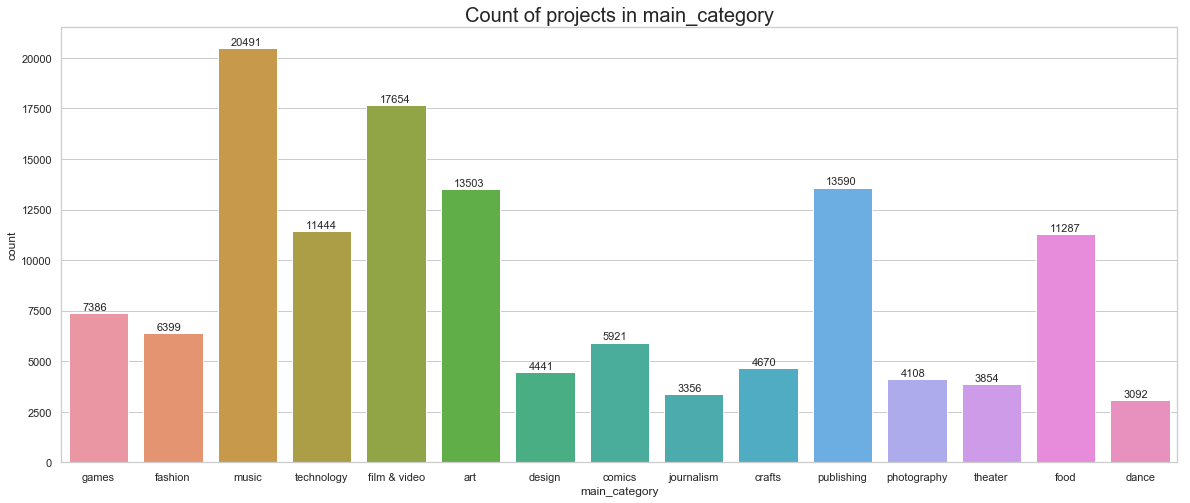

In [17]:
#plot histogram of the amount of projects among all the main_category
plt.figure(figsize=(20,8))
plt.title('Count of projects in main_category', fontsize=20)
axPlt = sns.countplot(x='main_category',data=df_kickstarters)

for i in axPlt.patches:
    # get_x pulls left or right; get_height pushes up or down
    axPlt.text(i.get_x()+.18, i.get_height()+150, \
            str(round((i.get_height()), 2)), fontsize=11)

Grouping by status:

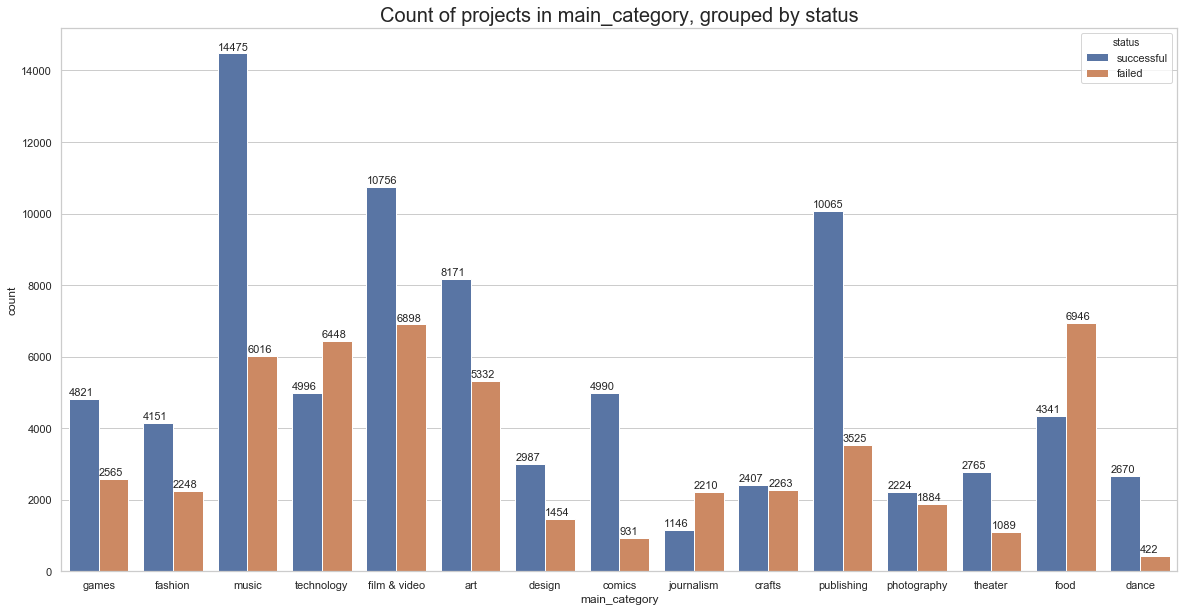

In [18]:
plt.figure(figsize=(20,10))
plt.title('Count of projects in main_category, grouped by status',fontsize=20)
ax = sns.countplot(x='main_category',hue='status',data=df_kickstarters)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11)

It seems that there are unequal numbers of successful and failed projects; to confirm we'll take a look at how many successful and failed kickstarters there are.

In [19]:
# views number of successful and failed kickstarters
print("Number of successful kickstarters: " + str(len(df_successful))); print("Number of failed kickstarters: " + str(len(df_failed)))

Number of successful kickstarters: 80965
Number of failed kickstarters: 50231


It seems that there are different numbers of successful and failed kickstarters; we will account for that by comparing the ratio of each category in the successful versus failed kickstarters.

Text(0, 0.5, 'proportion')

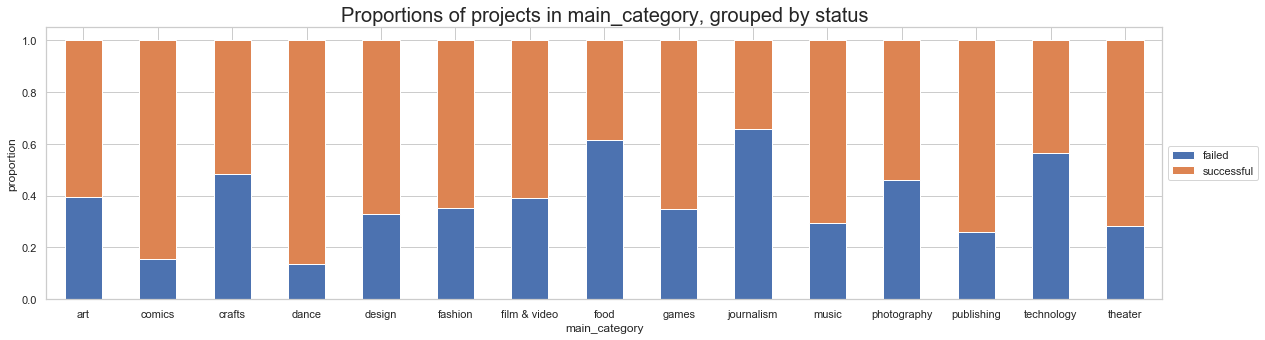

In [20]:
df_categories = df_kickstarters.groupby(['status','main_category'])['status'].count().unstack('main_category').fillna(0)
sub_df_categories = np.transpose(df_categories.div(df_categories.sum()))
sub_df_categories.plot(kind='bar',stacked=True,rot=0, figsize=(20,5))

plt.legend(('failed','successful'), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Proportions of projects in main_category, grouped by status',fontsize=20)
plt.ylabel('proportion')

Next we tried visualizing all the numerical data to see their distributions.

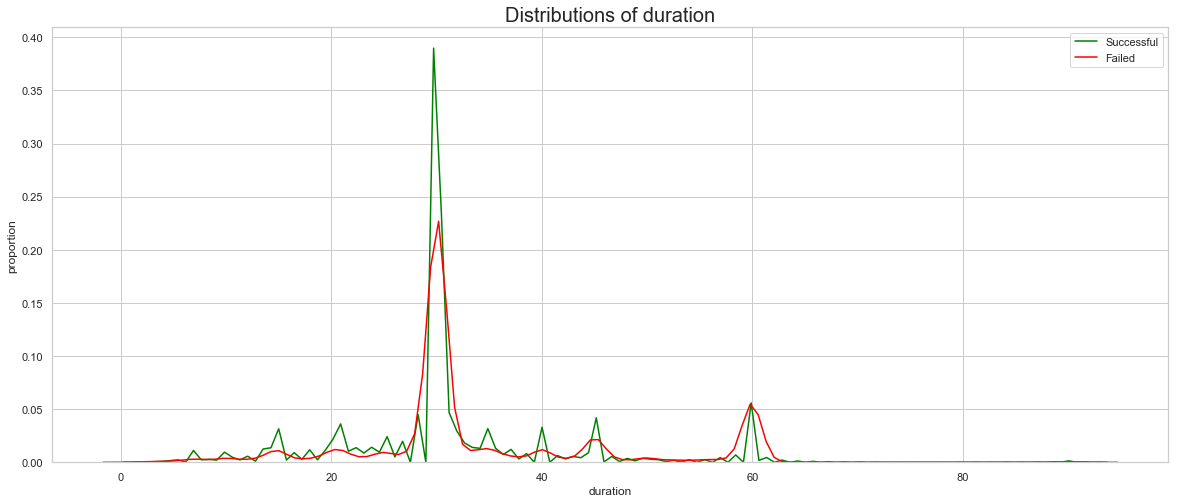

In [21]:
#distribution of duration
plt.figure(figsize=(20,8))
plt.title('Distributions of duration',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['duration'],label='Successful',color='green',hist=False)
sns.distplot(df_failed['duration'],label='Failed',color='red',hist=False)

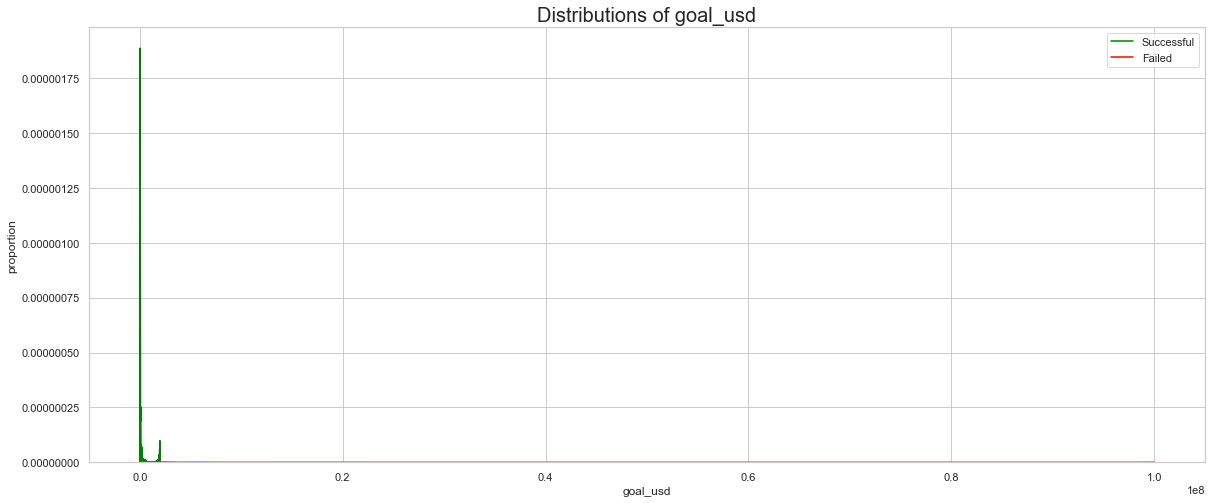

In [22]:
#distribution of goal_usd
plt.figure(figsize=(20,8))
plt.title('Distributions of goal_usd',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['goal_usd'],label='Successful',color='green',hist=False)
sns.distplot(df_failed['goal_usd'],label='Failed',color='red',hist=False)

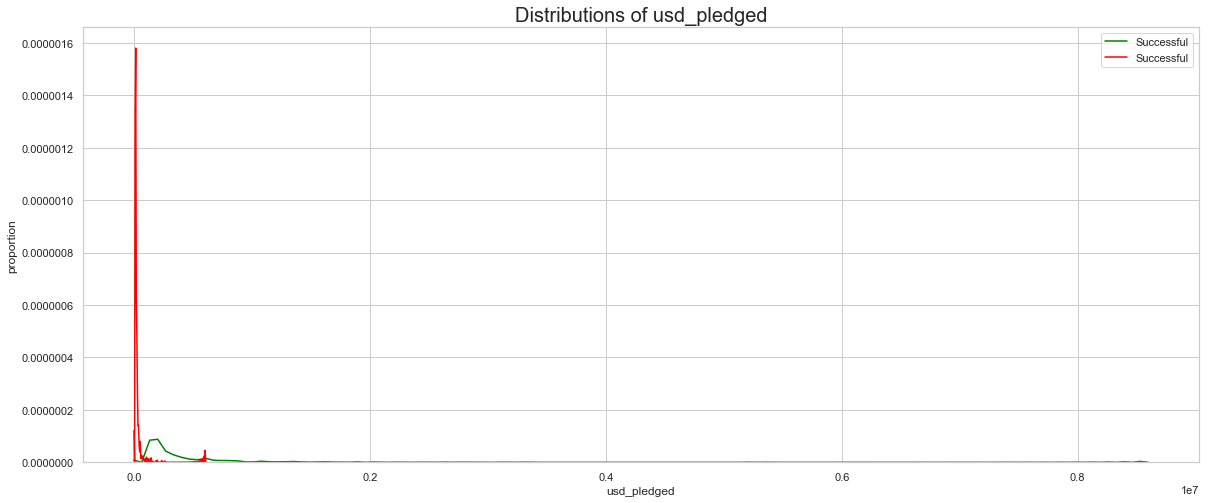

In [23]:
#distribution of usd_pledged
plt.figure(figsize=(20,8))
plt.title('Distributions of usd_pledged',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['usd_pledged'],label='Successful',color='green',hist=False)
sns.distplot(df_failed['usd_pledged'],label='Successful',color='red',hist=False)

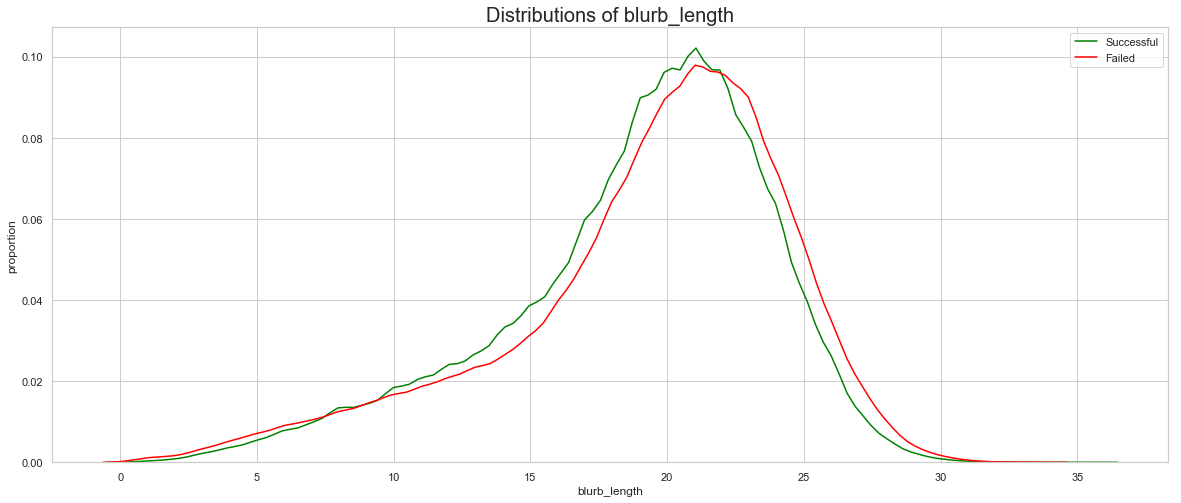

In [24]:
#distribution of blurb_length
plt.figure(figsize=(20,8))
plt.title('Distributions of blurb_length',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['blurb_length'],label='Successful',color='green',hist=False)
sns.distplot(df_failed['blurb_length'],label='Failed',color='red',hist=False)

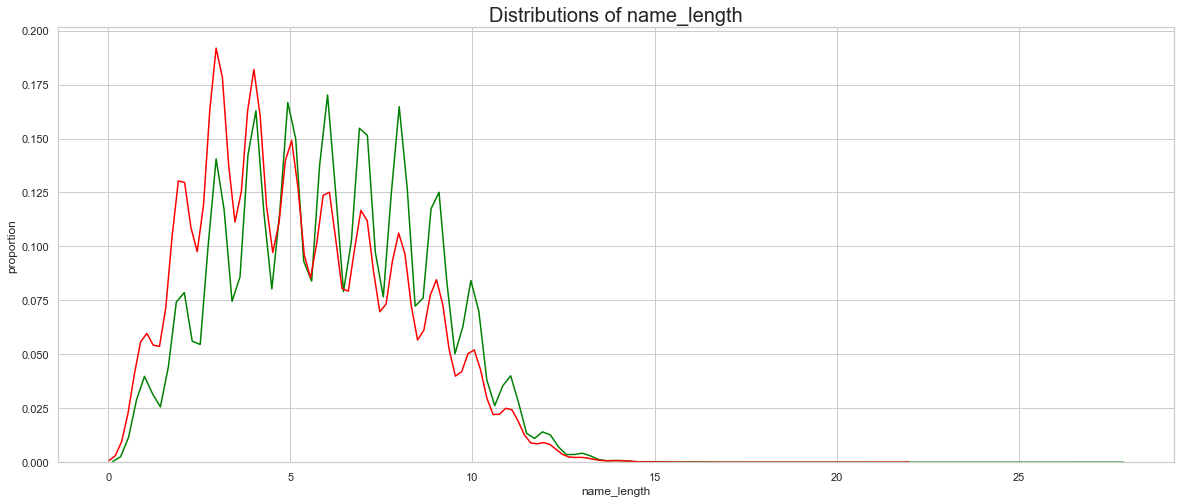

In [25]:
#distribution of name_length
plt.figure(figsize=(20,8))
plt.title('Distributions of name_length',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['name_length'],color='green',hist=False)
sns.distplot(df_failed['name_length'],color='red',hist=False)

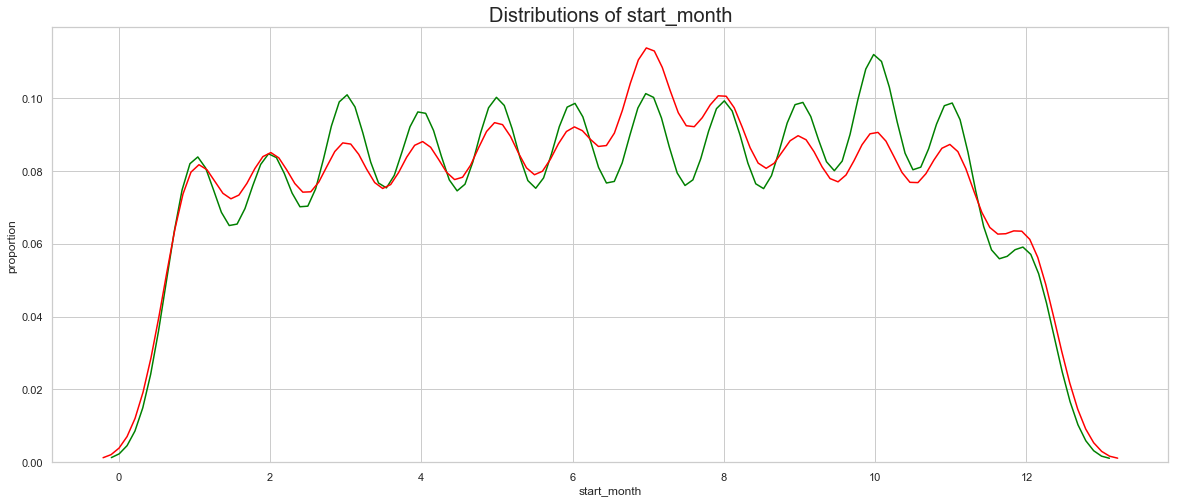

In [26]:
#distribution of star_month
plt.figure(figsize=(20,8))
plt.title('Distributions of start_month',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['start_month'],color='green',hist=False)
sns.distplot(df_failed['start_month'],color='red',hist=False)

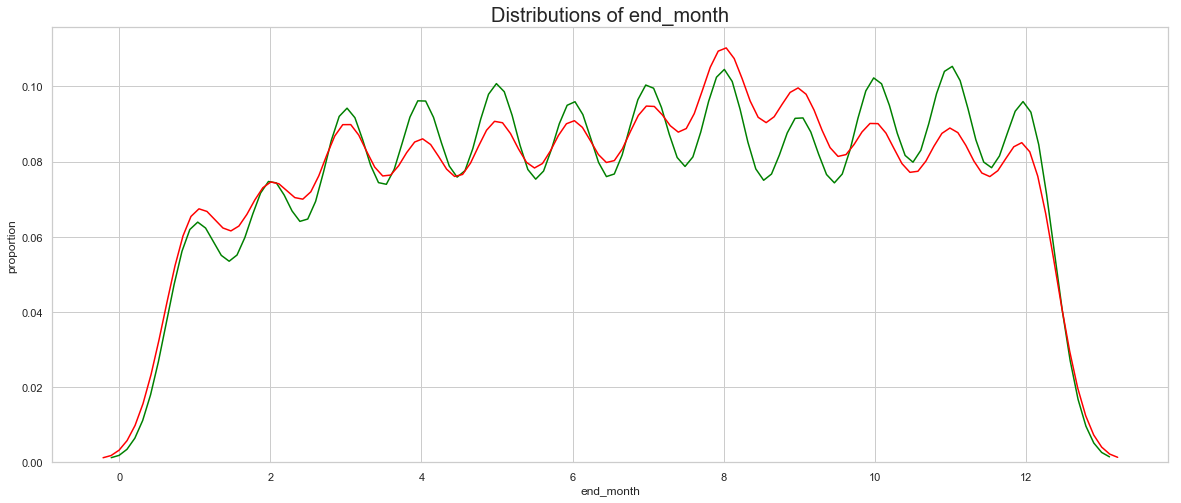

In [27]:
#distribution of end_month
plt.figure(figsize=(20,8))
plt.title('Distributions of end_month',fontsize=20)
plt.ylabel('proportion')

sns.distplot(df_successful['end_month'],color='green',hist=False)
sns.distplot(df_failed['end_month'],color='red',hist=False)

## Data Analysis

Upon these initial visualization of data, we can see that comics, dance, and music seem to have the highest success rates while food, journalism, and technology seem to not do that well. When we compare the overall number of kickstarters in each category, we can see that dance is the least and music is the most popular category, both being the most successful categories. However, it seems that the amount of kickstarters did not effect the rate of successes and failures in each category. 

For the next part of our analysis, we will try to search for differences between successful/failed kickstarters to help distinguish what attributes the successful starters had that the failed didn't.

check how many unique main categories and sub categories there are：

In [28]:
len(df_kickstarters['sub_category'].unique())

159

In [29]:
len(df_kickstarters['main_category'].unique())

15

We will drop some more columns:
- For data on start/end dates of projects, we agreed that observing trends at the month level is best, so we will drop the more specific dates in "launched_at" and "deadline" columns. In addition, some of the columns have redundancy with regards to project funding start and end date. Start and end month is the most balanced.
- The names of the Kickstarters are difficult to quantify and analyze sentiment with nltk as they often contain catchy phrases or made-up words to try to catch consumers' attention, so we will drop the "name" column as well.
- Finally, as shown above, there are 159 sub categories which is a bit excessive to analyze; but there are only 15 main categories which is good for analysis（And also our hypothesis is on main_category）. So we will drop the sub categories.

In [30]:
df_kickstarters.drop(columns=['launched_at', 'deadline', 'name', 'sub_category'], inplace=True)

Next, we will create a function that will change our status (successful, failed) column into binary variables, with 1.0 being successful and 0.0 being failed. We believe that doing this will make data analysis a little faster.

In [31]:
def convert_status(label):
    if label == "successful":
        return float(1.0)
    else:
        return float(0.0)

In [32]:
df_kickstarters['status'] = df_kickstarters['status'].apply(convert_status)

In [33]:
df_kickstarters.head()

,main_category,duration,goal_usd,city,state,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,goal_minus_pledge
0,games,16.0,2000.0,Menasha,WI,14,7,1.0,10,11,Q4,Q4,6061.0,-4061.0
2,fashion,30.0,1100.0,Manhattan,NY,21,7,1.0,6,7,Q2,Q3,1110.0,-10.0
3,music,45.0,3500.0,Nashville,TN,15,6,1.0,9,11,Q3,Q4,4807.0,-1307.0
4,technology,60.0,30000.0,Troy,MI,15,4,1.0,11,1,Q4,Q1,40368.0,-10368.0
5,music,30.0,7500.0,Seattle,WA,11,4,1.0,1,2,Q1,Q1,7770.0,-270.0


Next, we will analyze the means of failed and successful kickstarts for the quantitative variables (duration, goal, blurb length, name length, start and end months, and money pledged) using the groupby function.

In [34]:
df_grouped = df_kickstarters.groupby('status').mean()
df_grouped

,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged,goal_minus_pledge
status,,,,,,,,
0.0,34.601601,81020.575093,19.247716,5.252334,6.442516,6.715932,1061.582359,79958.992734
1.0,30.845921,9380.515233,18.849873,6.073439,6.470154,6.804175,22060.336532,-12679.821299


From this we get some key observations:
- We see clearly that the goals of failed kickstarters were set exponentially higher than their successful counterparts.

- There isn't any discerinble difference between start and end times, and blurb length.

- Successful kickstarters had shorter durations

- Obviously the successful kickstarters had a much higher pledge


In [35]:
df_std = df_kickstarters.groupby('status').std()
df_std

,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged,goal_minus_pledge
status,,,,,,,,
0.0,12.701759,1.659378e+06,5.204079,2.666351,3.306609,3.328290,5577.869893,1.659339e+06
1.0,10.607315,2.811928e+04,4.883005,2.640535,3.308368,3.336141,120522.291961,1.071039e+05


Let's take a further look into the differences in goal_usd between successful and failed

Text(0.5, 0, 'status')

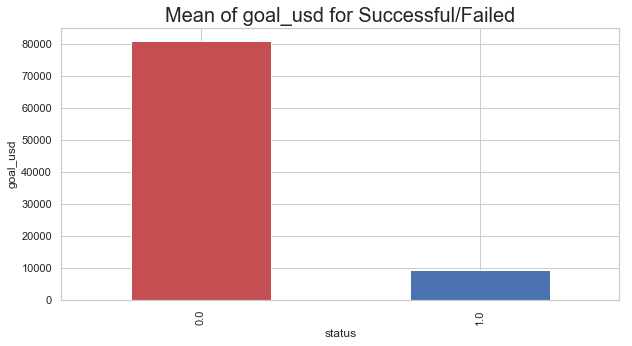

In [37]:
my_colors = list(['r', 'b'])
df_grouped.goal_usd.plot.bar(stacked=True, color=my_colors, figsize=(10,5))
plt.title('Mean of goal_usd for Successful/Failed', fontsize=20)
plt.ylabel('goal_usd')
plt.xlabel('status')

In [38]:
fail = df_grouped.loc[0, 'goal_usd']
success = df_grouped.loc[1, 'goal_usd']
percent = ((fail - success) / success) * 100

print("Compared to the successful kickstarters, the failed kickstarters had an increase of " 
      "{0:.2f}".format(percent) + "%\nin there USD goal amount")

Compared to the successful kickstarters, the failed kickstarters had an increase of 763.71%
in there USD goal amount


As we can see, a 736.38% increase in goal_usd for the failed kickstarters is a huge difference compared to the successful kickstarters.

This clearly shows that part of what makes a successful kickstarter is likely setting a realistic goal for funding.  If people who are looking into kickstarters notice that you've set your goal for funding unreasonably high especially with respect to the details of your project, why would they waste time and effort into funding your kickstarter if they know your funding goal likely won't be met?  Perhaps it can also be an indicator that shows that you are naive to the business side of things, which can be seen as a red flag.

In [40]:
df_success = df_kickstarters[df_kickstarters['status'] == 1 ]
df_fail = df_kickstarters[df_kickstarters['status'] == 0 ]

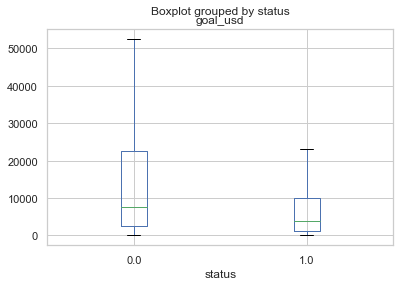

In [41]:
df_kickstarters.boxplot(column=['goal_usd'],by='status',showfliers=False)

It seems that the distributions are too nonnormal for statistical tests to work effectively. So instead, we decided to group the data by state and take the mean of the data by state to be analyzed.

In [42]:
## Get statistical data from each state
state_describe = df_kickstarters.groupby('state').describe()
state_describe

duration                                                     goal_usd  \
         count       mean        std   min   25%   50%   75%   max    count   
state                                                                         
AK       390.0  31.158974  10.517233   8.0  28.0  30.0  31.0  60.0    390.0   
AL       867.0  32.076125  11.483545   3.0  30.0  30.0  32.0  78.0    867.0   
AR       525.0  32.097143  12.062816   4.0  30.0  30.0  32.0  90.0    525.0   
AZ      2461.0  32.576595  11.755898   2.0  30.0  30.0  33.0  90.0   2461.0   
CA     24826.0  32.537420  11.520920   1.0  30.0  30.0  35.0  91.0  24826.0   
CO      3188.0  31.898369  10.697000   1.0  30.0  30.0  32.0  90.0   3188.0   
CT      1178.0  32.618846  11.663283   4.0  30.0  30.0  33.0  84.0   1178.0   
DE       290.0  34.179310  11.522008  10.0  30.0  30.0  35.0  60.0    290.0   
FL      6325.0  33.317154  11.859817   1.0  30.0  30.0  35.0  92.0   6325.0   
GA      3449.0  33.153958  11.757054   3.0  30.0  30.0  35.0  89.0   3449.0   
HI       593.0  33.067454  11.499508   3.0  30.0  30.0  35.0  90.0    593.0   
IA       689.0  31.748911  11.182261   5.0  30.0  30.0  31.0  90.0    689.0   
ID       671.0  31.493294  10.773774   6.0  30.0  30.0  31.5  60.0    671.0   
IL      5164.0  32.339659  11.611557   1.0  30.0  30.0  34.0  91.0   5164.0   
IN      1553.0  32.529298  11.566396   2.0  30.0  30.0  33.0  90.0   1553.0   
KS       614.0  32.778502  11.670006   3.0  30.0  30.0  32.0  91.0    614.0   
KY       989.0  32.509606  11.236470   3.0  30.0  30.0  33.0  89.0    989.0   
LA      1163.0  32.346518  11.496814   3.0  30.0  30.0  33.0  88.0   1163.0   
MA      3869.0  32.493926  11.191793   1.0  30.0  30.0  34.0  91.0   3869.0   
MD      1902.0  32.927445  11.471484   4.0  30.0  30.0  33.0  90.0   1902.0   
ME       701.0  31.831669  11.722636   3.0  30.0  30.0  32.0  90.0    701.0   
MI      3048.0  31.897310  11.671255   2.0  30.0  30.0  32.0  91.0   3048.0   
MN      2567.0  31.867160  11.187304   1.0  30.0  30.0  32.0  91.0   2567.0   
MO      2022.0  32.454006  11.796082   2.0  30.0  30.0  32.0  91.0   2022.0   
MS       359.0  31.771588  11.757711   4.0  30.0  30.0  31.0  61.0    359.0   
MT       497.0  30.478873  10.510750   5.0  28.0  30.0  31.0  60.0    497.0   
NC      3032.0  32.318931  11.599420   2.0  30.0  30.0  33.0  90.0   3032.0   
ND       153.0  31.209150   8.865704   9.0  30.0  30.0  30.0  60.0    153.0   
NE       418.0  31.708134  12.370615   5.0  28.0  30.0  33.0  76.0    418.0   
NH       580.0  31.356897  11.644350   7.0  30.0  30.0  31.0  60.0    580.0   
NJ      2134.0  32.970478  11.739858   3.0  30.0  30.0  35.0  90.0   2134.0   
NM       783.0  32.376756  11.622354   2.0  30.0  30.0  33.0  86.0    783.0   
NV      1828.0  28.915755  14.855646   1.0  20.0  30.0  31.0  91.0   1828.0   
NY     15838.0  32.548428  11.966562   1.0  30.0  30.0  35.0  93.0  15838.0   
OH      3462.0  32.449451  11.427809   3.0  30.0  30.0  33.0  91.0   3462.0   
OK       902.0  31.355876  12.679555   2.0  30.0  30.0  31.0  91.0    902.0   
OR      3468.0  31.171857  10.993372   2.0  29.0  30.0  32.0  91.0   3468.0   
PA      4324.0  32.204672  11.869362   1.0  30.0  30.0  33.0  90.0   4324.0   
RI       493.0  32.261663  11.216028   3.0  30.0  30.0  34.0  89.0    493.0   
SC      1072.0  31.969216  12.164680   1.0  29.0  30.0  32.0  89.0   1072.0   
SD       169.0  30.390533   9.260845   5.0  30.0  30.0  30.0  60.0    169.0   
TN      2647.0  32.402720  11.439557   2.0  30.0  30.0  33.0  90.0   2647.0   
TX      7780.0  32.015810  11.359628   1.0  30.0  30.0  32.0  90.0   7780.0   
UT      2248.0  31.270018  10.124000   1.0  30.0  30.0  31.0  91.0   2248.0   
VA      2602.0  32.110300  11.681525   4.0  30.0  30.0  33.0  90.0   2602.0   
VT       592.0  31.641892  10.778502   2.0  29.0  30.0  32.0  90.0    592.0   
WA      4557.0  31.349133  10.793674   1.0  30.0  30.0  32.0  91.0   4557.0   
WI      1745.0  32.260172  11.870041   2.0  30.0  30.0  

In [43]:
state_describe_succ = df_successful.groupby('state').describe()
state_describe_succ

duration                                                      goal_usd  \
         count       mean        std   min    25%   50%   75%   max    count   
state                                                                          
AK       247.0  29.481781   9.237091   9.0  26.00  30.0  31.0  60.0    247.0   
AL       451.0  29.649667   9.745728   3.0  24.00  30.0  31.0  60.0    451.0   
AR       244.0  30.241803  11.822197   7.0  25.00  30.0  31.0  90.0    244.0   
AZ      1314.0  30.793760  10.690163   5.0  28.00  30.0  31.0  90.0   1314.0   
CA     16457.0  31.373640  10.514220   1.0  30.00  30.0  33.0  91.0  16457.0   
CO      1924.0  30.768711   9.344231   2.0  30.00  30.0  31.0  76.0   1924.0   
CT       723.0  31.461964  10.987887   7.0  30.00  30.0  32.0  84.0    723.0   
DE       163.0  33.969325  11.190507  10.0  30.00  30.0  35.0  60.0    163.0   
FL      2787.0  31.479727  10.709765   4.0  30.00  30.0  33.0  90.0   2787.0   
GA      1671.0  30.947337  10.666455   3.0  28.00  30.0  32.0  89.0   1671.0   
HI       326.0  32.279141  11.026904   7.0  30.00  30.0  34.0  90.0    326.0   
IA       394.0  29.946701   9.390575   5.0  29.00  30.0  30.0  60.0    394.0   
ID       383.0  29.543081   9.926568   7.0  25.00  30.0  30.0  60.0    383.0   
IL      3300.0  30.874242  10.503263   2.0  29.00  30.0  32.0  90.0   3300.0   
IN       788.0  30.583756  10.915144   2.0  28.00  30.0  31.0  90.0    788.0   
KS       292.0  30.948630  10.154854   4.0  30.00  30.0  31.0  91.0    292.0   
KY       528.0  30.979167   9.641857   3.0  30.00  30.0  32.0  89.0    528.0   
LA       676.0  30.721893   9.819083   4.0  29.00  30.0  32.0  76.0    676.0   
MA      2814.0  31.686212  10.483748   1.0  30.00  30.0  33.0  91.0   2814.0   
MD      1100.0  31.285455  10.443503   5.0  30.00  30.0  31.0  90.0   1100.0   
ME       454.0  29.876652  10.510070   4.0  26.00  30.0  31.0  90.0    454.0   
MI      1786.0  29.823068  10.397481   3.0  27.00  30.0  31.0  91.0   1786.0   
MN      1768.0  30.967760  10.291319   1.0  29.00  30.0  31.0  91.0   1768.0   
MO      1147.0  30.906713  10.786401   5.0  28.50  30.0  31.0  91.0   1147.0   
MS       172.0  29.209302   9.891359   7.0  25.75  30.0  30.0  60.0    172.0   
MT       329.0  29.562310   9.293811  10.0  25.00  30.0  30.0  60.0    329.0   
NC      1648.0  30.674150  10.209524   2.0  28.00  30.0  32.0  67.0   1648.0   
ND        86.0  29.755814   7.806387   9.0  30.00  30.0  30.0  60.0     86.0   
NE       207.0  29.227053  11.132984   7.0  25.00  30.0  30.0  76.0    207.0   
NH       356.0  29.199438  10.649187   7.0  25.00  30.0  30.0  60.0    356.0   
NJ      1162.0  31.530981  11.683133   3.0  30.00  30.0  33.0  90.0   1162.0   
NM       458.0  30.637555  10.378381   4.0  29.00  30.0  31.0  75.0    458.0   
NV      1082.0  24.655268  14.457645   1.0  10.00  30.0  30.0  91.0   1082.0   
NY     11402.0  31.502894  11.138846   1.0  29.00  30.0  33.0  93.0  11402.0   
OH      1863.0  31.041868  10.276487   3.0  29.00  30.0  32.0  86.0   1863.0   
OK       468.0  28.705128  12.373151   2.0  24.00  30.0  30.0  91.0    468.0   
OR      2420.0  29.919421  10.206129   2.0  27.00  30.0  31.0  91.0   2420.0   
PA      2728.0  30.564883  10.729745   3.0  28.00  30.0  31.0  90.0   2728.0   
RI       334.0  31.188623  10.194669   4.0  30.00  30.0  32.0  89.0    334.0   
SC       581.0  29.958692  10.881098   3.0  25.00  30.0  31.0  89.0    581.0   
SD        81.0  29.037037   7.802955  12.0  28.00  30.0  30.0  60.0     81.0   
TN      1700.0  31.090000  10.195362   3.0  29.00  30.0  32.0  90.0   1700.0   
TX      4356.0  30.015152   9.982016   1.0  28.00  30.0  31.0  90.0   4356.0   
UT      1423.0  30.394238   9.394758   7.0  29.00  30.0  31.0  91.0   1423.0   
VA      1441.0  30.188064  10.399721   4.0  28.00  30.0  31.0  90.0   1441.0   
VT       456.0  30.804825   9.909218   2.0  27.00  30.0  32.0  90.0    456.0   
WA      3161.0  30.284087   9.906348   2.0  28.00  30.0  31.0  91.0   3161.0   
WI    

In [44]:
state_describe_fail = df_failed.groupby('state').describe()
state_describe_fail

duration                                                      goal_usd  \
         count       mean        std   min   25%   50%    75%   max    count   
state                                                                          
AK       143.0  34.055944  11.910332   8.0  30.0  30.0  36.50  60.0    143.0   
AL       416.0  34.706731  12.603903   6.0  30.0  30.0  39.00  78.0    416.0   
AR       281.0  33.708185  12.058795   4.0  30.0  30.0  35.00  60.0    281.0   
AZ      1147.0  34.619006  12.566212   2.0  30.0  30.0  38.00  90.0   1147.0   
CA      8369.0  34.825905  12.979574   1.0  30.0  30.0  40.00  91.0   8369.0   
CO      1264.0  33.617880  12.283805   1.0  30.0  30.0  36.00  90.0   1264.0   
CT       455.0  34.457143  12.455641   4.0  30.0  30.0  38.00  60.0    455.0   
DE       127.0  34.448819  11.973323  11.0  30.0  30.0  35.00  60.0    127.0   
FL      3538.0  34.764556  12.505366   1.0  30.0  30.0  40.00  92.0   3538.0   
GA      1778.0  35.227784  12.345312   4.0  30.0  30.0  40.00  80.0   1778.0   
HI       267.0  34.029963  12.002155   3.0  30.0  30.0  36.50  60.0    267.0   
IA       295.0  34.155932  12.828649   6.0  30.0  30.0  34.00  90.0    295.0   
ID       288.0  34.086806  11.313528   6.0  30.0  30.0  35.00  60.0    288.0   
IL      1864.0  34.934013  12.952386   1.0  30.0  30.0  40.00  91.0   1864.0   
IN       765.0  34.533333  11.879103   7.0  30.0  30.0  35.00  60.0    765.0   
KS       322.0  34.437888  12.680013   3.0  30.0  30.0  40.00  60.0    322.0   
KY       461.0  34.262473  12.605834   5.0  30.0  30.0  40.00  60.0    461.0   
LA       487.0  34.601643  13.166293   3.0  30.0  30.0  40.00  88.0    487.0   
MA      1055.0  34.648341  12.647030   1.0  30.0  30.0  40.00  89.0   1055.0   
MD       802.0  35.179551  12.405153   4.0  30.0  30.0  40.00  60.0    802.0   
ME       247.0  35.425101  12.946162   3.0  30.0  30.0  41.00  90.0    247.0   
MI      1262.0  34.832805  12.704340   2.0  30.0  30.0  40.00  90.0   1262.0   
MN       799.0  33.857322  12.734504   4.0  30.0  30.0  36.00  90.0    799.0   
MO       875.0  34.482286  12.725696   2.0  30.0  30.0  40.00  90.0    875.0   
MS       187.0  34.128342  12.824900   4.0  30.0  30.0  39.00  61.0    187.0   
MT       168.0  32.273810  12.392630   5.0  30.0  30.0  33.00  60.0    168.0   
NC      1384.0  34.277457  12.793749   2.0  30.0  30.0  36.00  90.0   1384.0   
ND        67.0  33.074627   9.810806  10.0  30.0  30.0  31.50  60.0     67.0   
NE       211.0  34.142180  13.048944   5.0  30.0  30.0  40.00  60.0    211.0   
NH       224.0  34.785714  12.340046   7.0  30.0  30.0  40.00  60.0    224.0   
NJ       972.0  34.691358  11.580614   5.0  30.0  30.0  39.25  90.0    972.0   
NM       325.0  34.827692  12.798335   2.0  30.0  30.0  38.00  86.0    325.0   
NV       746.0  35.095174  13.164944   5.0  30.0  30.0  40.00  89.0    746.0   
NY      4436.0  35.235798  13.504096   1.0  30.0  30.0  40.00  92.0   4436.0   
OH      1599.0  34.089431  12.441558   3.0  30.0  30.0  35.00  91.0   1599.0   
OK       434.0  34.214286  12.395063   3.0  30.0  30.0  35.00  60.0    434.0   
OR      1048.0  34.063931  12.146225   5.0  30.0  30.0  38.00  65.0   1048.0   
PA      1596.0  35.007519  13.135558   1.0  30.0  30.0  40.00  90.0   1596.0   
RI       159.0  34.515723  12.850580   3.0  30.0  30.0  39.50  60.0    159.0   
SC       491.0  34.348269  13.146540   1.0  30.0  30.0  40.00  70.0    491.0   
SD        88.0  31.636364  10.312566   5.0  30.0  30.0  30.00  60.0     88.0   
TN       947.0  34.759240  13.064853   2.0  30.0  30.0  40.00  90.0    947.0   
TX      3424.0  34.561040  12.446312   1.0  30.0  30.0  40.00  90.0   3424.0   
UT       825.0  32.780606  11.116401   1.0  30.0  30.0  33.00  90.0    825.0   
VA      1161.0  34.496124  12.705288   6.0  30.0  30.0  39.00  90.0   1161.0   
VT       136.0  34.448529  12.936208   7.0  30.0  30.0  36.75  60.0    136.0   
WA      1396.0  33.760745  12.239430   1.0  30.0  30.0  35.00  88.0   1396.0   
WI    

We will now create plots of the mean durations, grouped by state.

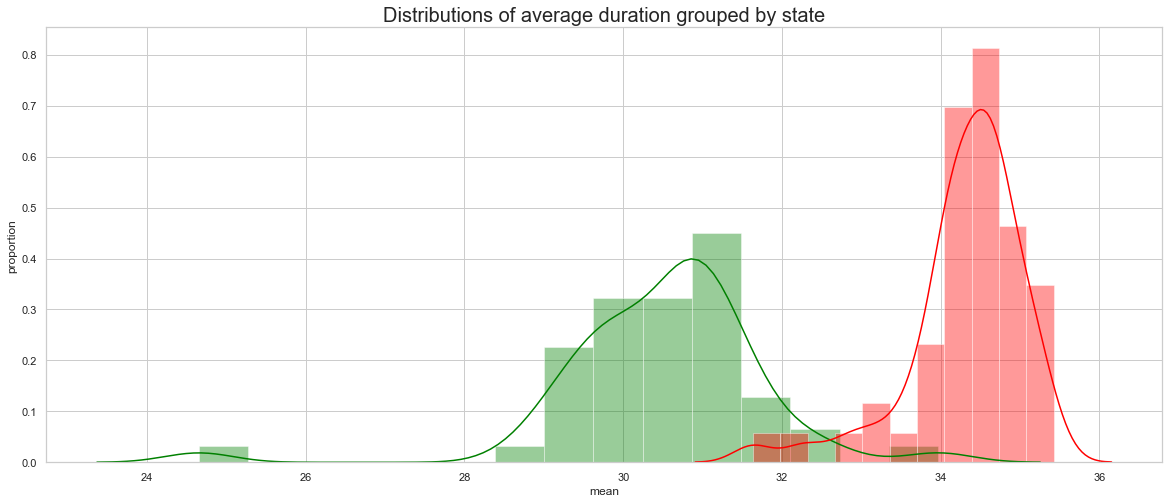

In [45]:
plt.figure(figsize=(20,8))
plt.title('Distributions of average duration grouped by state',fontsize=20)
plt.ylabel('proportion')

sns.distplot(state_describe_succ['duration']['mean'],color='green')
sns.distplot(state_describe_fail['duration']['mean'],color='red')

Visually, there appears to be a significant difference in distributions; we will use a t-test to confirm.

In [46]:
stats.ttest_ind(state_describe_succ['duration']['mean'],state_describe_fail['duration']['mean'])

Ttest_indResult(statistic=-18.101157995571793, pvalue=5.09510228013049e-33)

The p-value is much less than alpha value of 0.05; we can thus see that durations of Kickstarters is an important determinant, with failed kickstarters usually taking longer.

Next we will compare the distributions of the average start and end months grouped by state.

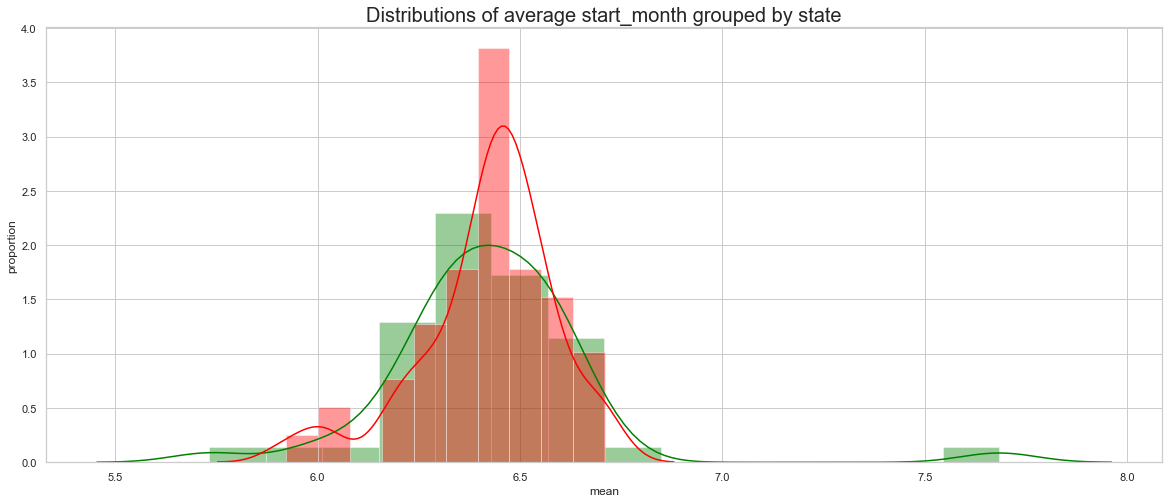

In [47]:
plt.figure(figsize=(20,8))
plt.title('Distributions of average start_month grouped by state',fontsize=20)
plt.ylabel('proportion')

sns.distplot(state_describe_succ['start_month']['mean'],color='green')
sns.distplot(state_describe_fail['start_month']['mean'],color='red')

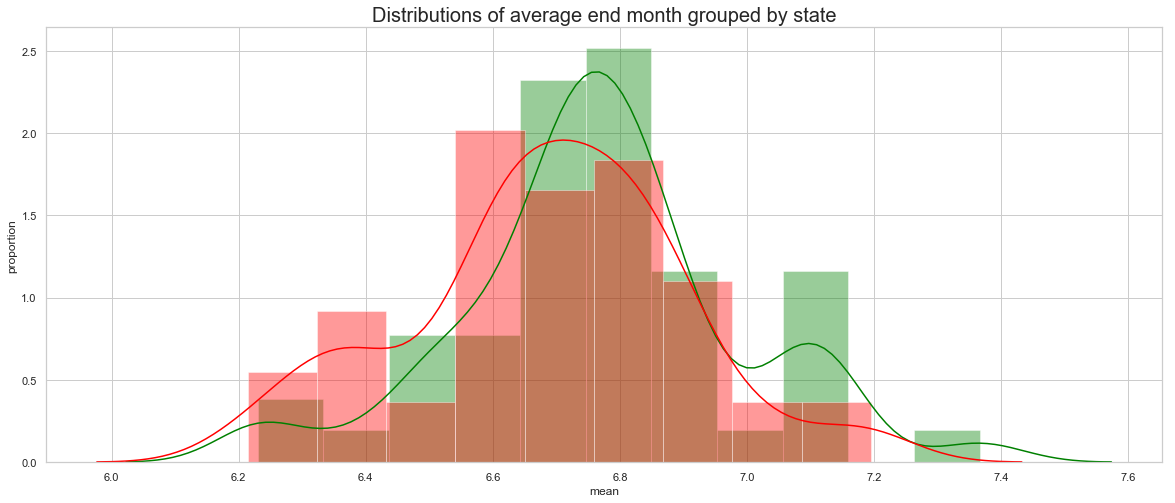

In [48]:
plt.figure(figsize=(20,8))
plt.title('Distributions of average end month grouped by state',fontsize=20)
plt.ylabel('proportion')

sns.distplot(state_describe_succ['end_month']['mean'],color='green')
sns.distplot(state_describe_fail['end_month']['mean'],color='red')

There doesn't seem to be much visual difference in these distributions; we ran t-tests to corroborate our visual conclusions.

In [49]:
stats.ttest_ind(state_describe_succ['start_month']['mean'],state_describe_fail['start_month']['mean'])

Ttest_indResult(statistic=0.11668212708718963, pvalue=0.9073507397613596)

In [50]:
stats.ttest_ind(state_describe_succ['end_month']['mean'],state_describe_fail['end_month']['mean'])

Ttest_indResult(statistic=1.9461683961465335, pvalue=0.05449862733150008)

Indeed, the t-test of distributions of average start and end months grouped by state did not output p-values less than 0.05 and thus the start and end months of Kickstarters don't seem to affect status significantly.

Lastly, we will test which states Kickstarters are most likely to achieve success in.

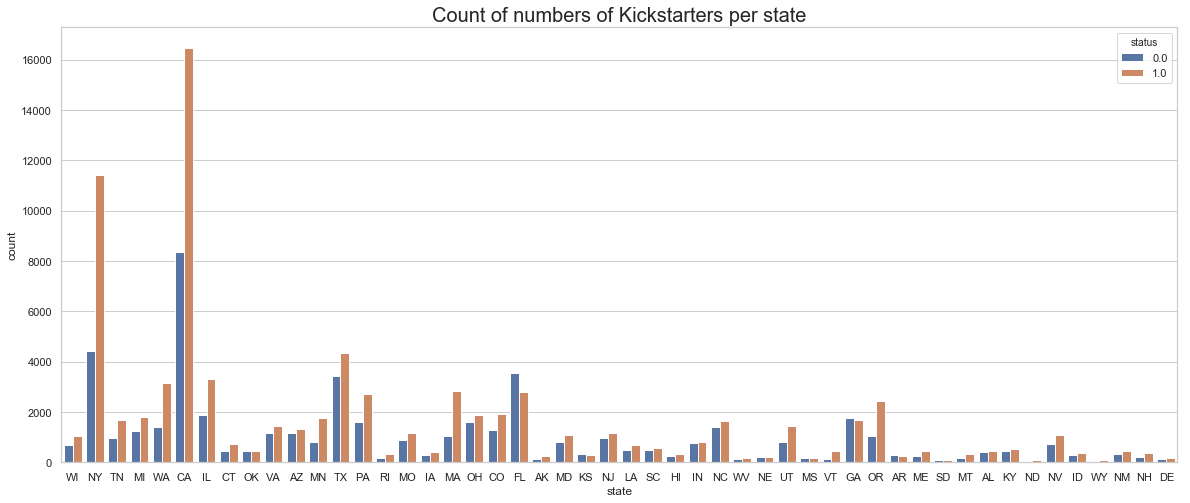

In [52]:
plt.figure(figsize=(20,8))
plt.title('Count of numbers of Kickstarters per state',fontsize=20)
plt.ylabel('proportion')

ax_state = sns.countplot(x='state',hue='status',data=df_kickstarters)

And a plot of proportions:

Text(0.5, 1.0, 'Proportion of numbers of Kickstarters per state')

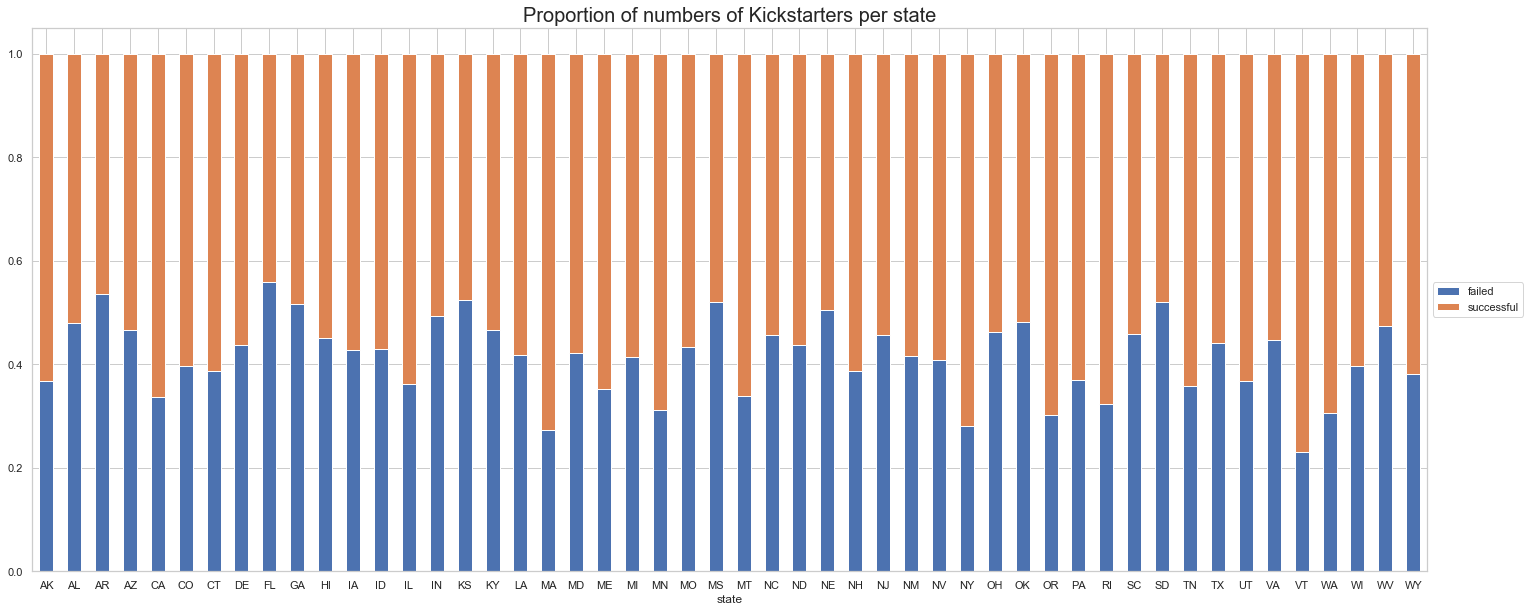

In [53]:
df_state = df_kickstarters.groupby(['status','state'])['status'].count().unstack('state').fillna(0)
sub_df_state = np.transpose(df_state.div(df_state.sum()))
sub_df_state.plot(kind='bar',stacked=True,rot=0, figsize=(25,10))

plt.legend(('failed','successful'), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Proportion of numbers of Kickstarters per state',fontsize=20)

# Data Analysis Summary

#### 1.) Duration
- It appears that if your project goes beyond 32 days you have a very high likelihood of having a failed     kickstarter
- For successful kickstarters success is determined before the 32 day mark
- The average duration for successful kickstarters is ~30, while the average duration for the failed kickstarters is ~34.  The std deviation for successful and failed kickstarters is 10, and 12
  
#### 2.) USD_Goal
- The difference in the total USD goal for failed/kickstarters is massive.  There is an 736.38% increase in goal_usd for the failed kickstarters compared to successful
- Failed kickstarters have a average goal of about \\$81,020
- Successful kickstarters have an average goal of about \\$9380
- Why the stark difference?  Possibly due to reasonable goals/expectations, a certain level of preparedness and experience.  It probably also matters when someone is deciding whether or not they will pledge to the cause

#### 3.) Categories -- Listed below are the top 4 successful categories
- Dance has a much lower number of kickstarters at 3,092 (lowest of the top 4).  However, they also have the highest success rate at 86%
- Comics has a total of 5,921 kickstarters (3rd in terms of total kickstarters) with a success rate of 84%
- Publishing has the second greatest number of kickstarters with a total of 13,590 with a success rate of 74% (which is the 3rd highest success rate)
- Music has the greatest number kickstarters at 20,491, and alternatively it has the 4th highest success rate of 70% which is nothing to scoff at

#### 4.) Start/end month
- Based on the observations we noticed that you're in trouble if your project starts later than October, such as November or December. You're lowering your chances of success by a large margin.  At the same time when we compared start time to end time, the end time of January and early February also has a lowered chance of success which is consistent with our obvservation for start time.  Since on average duration is about a month, the detrimental effects of starting in November/Decmeber are observed in the end time success of January the next year.

# Ethics & Privacy

We must decide if Kickstarter and crowdfunding should only be used to fund a project’s minimum requirements or whether these “above and beyond” moments of success should be allowed and celebrated, and we must also decide if Kickstarter’s essential nature is to allow unestablished artists and creators to find success or if people like Braff should be allowed  to use the service despite their previous success.

Unique from other creators, Kickstarter creators have a preexisting obligation to their consumers to deliver a certain amount of quality, because many of their consumers will have already paid money and will have a certain expectation for what will be delivered. Does the artist’s vision suffer when they are encouraged to meet a certain expectation? If so, is it okay if their vision is changed to please  their backers, who funded the actual creation? Crowdsourcing offers an interesting dilemma, and begs the question: is the essential nature of creation to please consumers even if some artistic vision is lost, or is it to allow the artist absolute freedom in their creation?

Considering using this dataset which is showing the results from each kickstarter projects, then it could be another ethical problem that we are using their information. Although this dataset does not consist of any information regarding to neither personal nor confidential, there is a way to track which project was successful by looking and analyzing all the information here; it could be a risk of revealing personal information as well.

# Conclusion & Discussion

Which category/subcategory is the most successful/ the least according to the funding success result?
“music”,”film & video”, and “publishing” have the most common for kickstarter projects’ main categories. Although these main categories are quite common, it does not mean that they have the highest rates of getting better successful rates. From the ratio chart, we found out that the most successful main categories were “dance”, “comics”, and “publishing”. 

Also, the plot graphing showed that the successful projects tend to have shorter  duration than failed ones, and the reasons we considered were because they analyzed their duration which their goals can be accomplished by the end of the duration they set, Also, it is showing that failed projects’ durations are distributed wider than the successful, therefore, we concluded that the most successful duration must be between about 28 and 32 days, according to the graph and our analysis